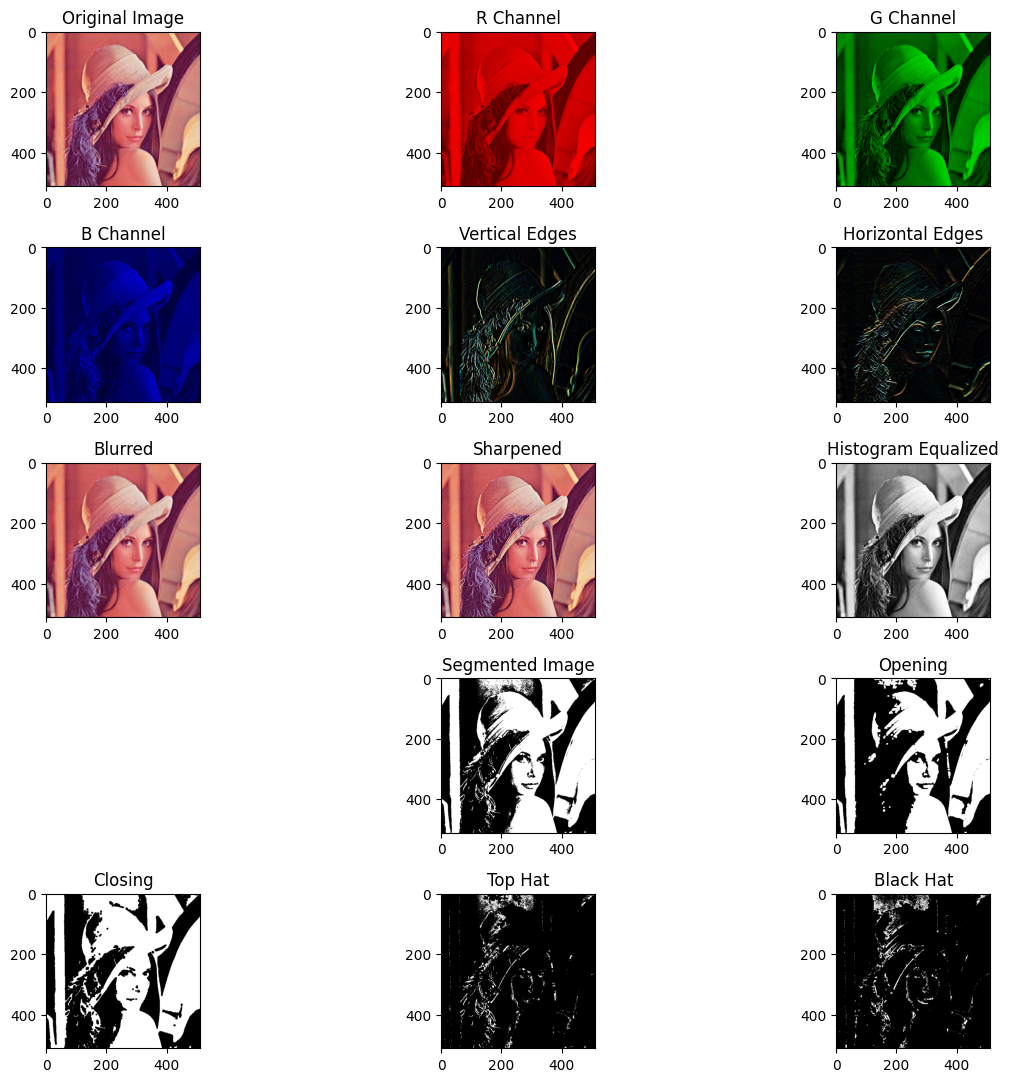

In [23]:
# 7.1 Image processing operations
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = 'lena.png'  # Update this to the path of your image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

n = 5

# Plot the original image
plt.figure(figsize=(12, 15))
plt.subplot(n+2, 3, 1)
plt.imshow(image)
plt.title('Original Image')

# Split the image into R, G, B channels
for i, color in enumerate(['R', 'G', 'B']):
    temp_image = np.zeros(image.shape, dtype='uint8')
    temp_image[:, :, i] = image[:, :, i]
    plt.subplot(n+2, 3, i+2)
    plt.imshow(temp_image)
    plt.title(f'{color} Channel')

# Define kernels for edge detection, blurring, and sharpening
kernel_vertical = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_horizontal = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
kernel_blur = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Apply kernels using filter2D
edges_vertical = cv2.filter2D(image, -1, kernel_vertical)
edges_horizontal = cv2.filter2D(image, -1, kernel_horizontal)
blurred = cv2.filter2D(image, -1, kernel_blur)
sharpened = cv2.filter2D(image, -1, kernel_sharpen)

# Apply histogram equalization
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
equalized = cv2.equalizeHist(gray)
equalized = cv2.cvtColor(equalized, cv2.COLOR_GRAY2RGB)  # Convert back to RGB for consistency in display

# Plot the results
images = [edges_vertical, edges_horizontal, blurred, sharpened, equalized]
titles = ['Vertical Edges', 'Horizontal Edges', 'Blurred', 'Sharpened', 'Histogram Equalized']
for i in range(n):
    plt.subplot(n+2, 3, i+5)
    plt.imshow(images[i])
    plt.title(titles[i])

# Simple segmentation (thresholding)
_, segmented = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plt.subplot(n+2, 3, 11)
plt.imshow(segmented, cmap='gray')
plt.title('Segmented Image')

# Morphological transformations
kernel = np.ones((5, 5), np.uint8)

# Opening
opening = cv2.morphologyEx(segmented, cv2.MORPH_OPEN, kernel)

# Closing
closing = cv2.morphologyEx(segmented, cv2.MORPH_CLOSE, kernel)

# Top Hat
top_hat = cv2.morphologyEx(segmented, cv2.MORPH_TOPHAT, kernel)

# Black Hat
black_hat = cv2.morphologyEx(segmented, cv2.MORPH_BLACKHAT, kernel)

# Plot the morphological transformations
morph_images = [opening, closing, top_hat, black_hat]
morph_titles = ['Opening', 'Closing', 'Top Hat', 'Black Hat']
for i in range(4):
    plt.subplot(n+2, 3, i+12)
    plt.imshow(morph_images[i], cmap='gray')
    plt.title(morph_titles[i])

plt.tight_layout()
plt.show()


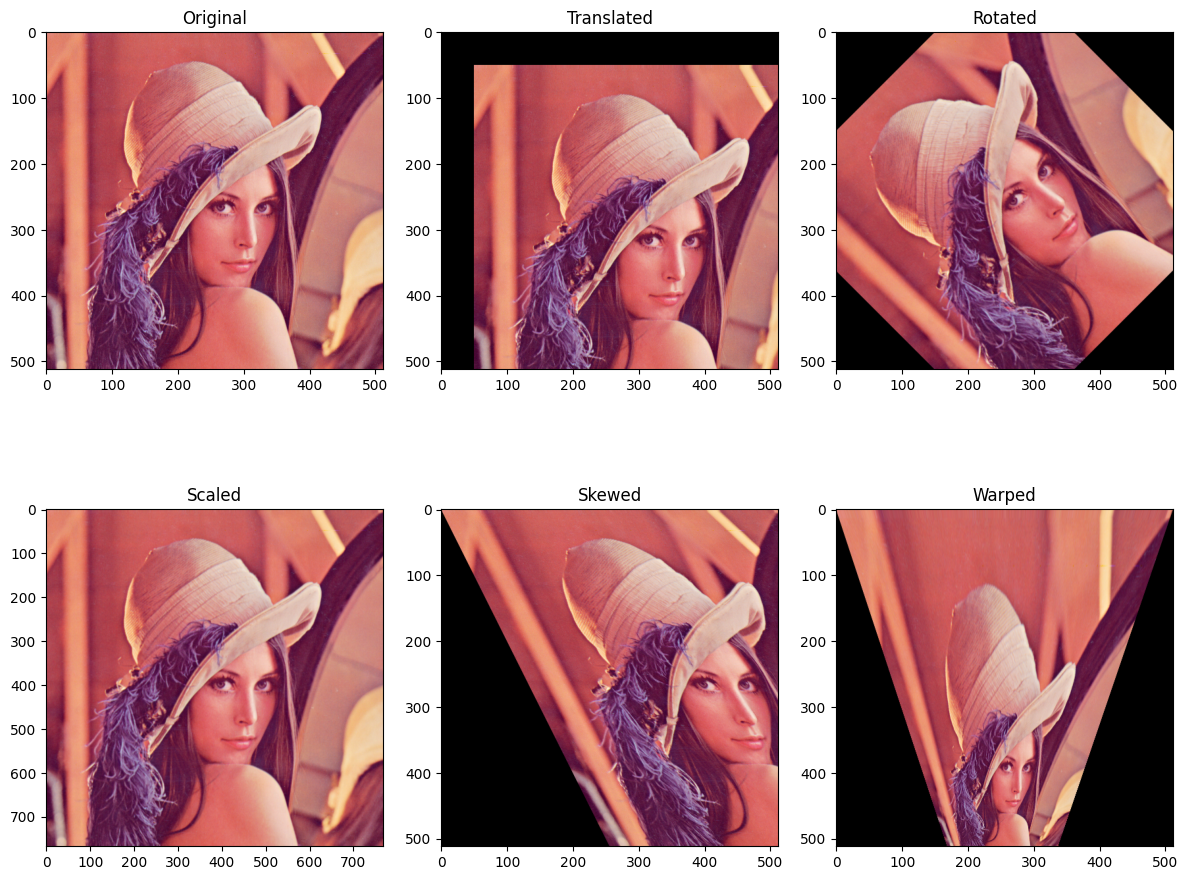

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = 'lena.png'  # Update this to the path of your image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Translation
def translate(image, tx, ty):
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    translated = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return translated

# Rotation
def rotate(image, angle):
    (h, w) = image.shape[:2]
    center = (w / 2, h / 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

# Scaling
def scale(image, fx, fy):
    scaled = cv2.resize(image, None, fx=fx, fy=fy)
    return scaled

# Skewing
def skew(image, skew_factor):
    M = np.float32([[1, skew_factor, 0], [0, 1, 0]])
    skewed = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return skewed

# Perspective Warping
def perspective_warp(image):
    (h, w) = image.shape[:2]
    src_points = np.float32([[0, 0], [w - 1, 0], [0, h - 1], [w - 1, h - 1]])
    dst_points = np.float32([[0, 0], [w - 1, 0], [int(0.33 * w), h - 1], [int(0.66 * w), h - 1]])
    M = cv2.getPerspectiveTransform(src_points, dst_points)
    warped = cv2.warpPerspective(image, M, (w, h))
    return warped

# Apply transformations
translated = translate(image, 50, 50)
rotated = rotate(image, 45)
scaled = scale(image, 1.5, 1.5)
skewed = skew(image, 0.5)
warped = perspective_warp(image)

# Plot the results
plt.figure(figsize=(12, 10))
titles = ['Original', 'Translated', 'Rotated', 'Scaled', 'Skewed', 'Warped']
images = [image, translated, rotated, scaled, skewed, warped]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])

plt.tight_layout()
plt.show()


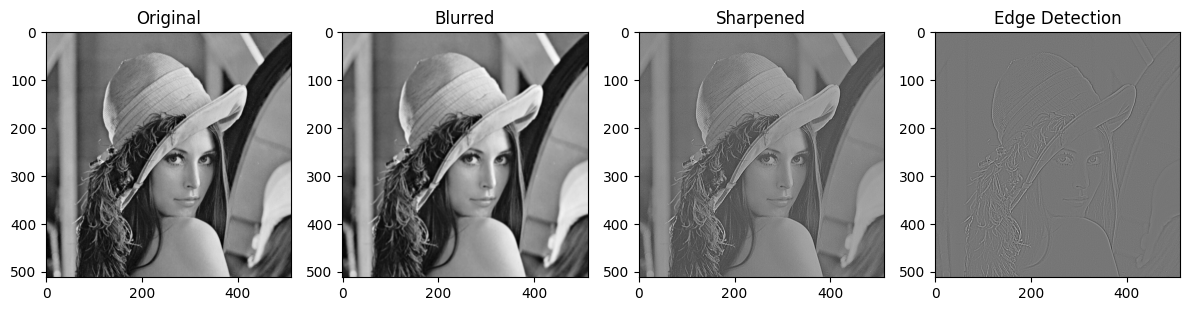

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def convolve(image, kernel):
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]
    pad = (kW - 1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")
    for y in range(pad, iH + pad):
        for x in range(pad, iW + pad):
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            k = (roi * kernel).sum()
            output[y - pad, x - pad] = k
    return output

# Read the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define kernels
kernel_blur = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]], dtype="float32") / 9.0
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype="float32")
kernel_edge = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], dtype="float32")

# Apply convolution
blurred = convolve(image, kernel_blur)
sharpened = convolve(image, kernel_sharpen)
edged = convolve(image, kernel_edge)

# Plot the results
plt.figure(figsize=(12, 5))
titles = ['Original', 'Blurred', 'Sharpened', 'Edge Detection']
images = [image, blurred, sharpened, edged]

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])

plt.tight_layout()
plt.show()


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input

# Create a simple model with one convolutional layer
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')
])

# Summarize the model
model.summary()

# Define an example input
input_image = np.random.rand(1, 28, 28, 1)

# Get the output of the convolutional layer
output = model.predict(input_image)

# Print the shape of the output
print("Input shape:", input_image.shape)
print("Output shape:", output.shape)


2024-07-29 19:28:49.576024: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Input shape: (1, 28, 28, 1)
Output shape: (1, 28, 28, 32)
